# Computational Learning: Classification, Task A

## Code setup

*This is a setup for the code execution in the user's computer, made to provide an easy execution and ensure the reproducibility of the results showcased in this work*

In [1]:
# Basic libraries that come with every Python installation
import os
import logging
import subprocess
import sys
import importlib
from typing import Union, List, Dict

These are global variables that can eb changed by the user in order to personalize the execution of the code.

In [15]:
# Folder used to download any necessary data to perform the study (datasets). You may use a relative or absolute path of your computer.
INPUT_DATA_FOLDER = "/home/mariopasc/Uni/Computational_Learning/Lab2/taskA_output"

# Output folder to store the results of the study
OUTPUT_FOLDER = "."

### Error management output

Error management with a `.log` file. 

In [12]:
# Set up error logging to "errors.log"
logging.basicConfig(
    filename="errors.log",
    level=logging.ERROR,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

### Directory tree

Set up the directory folder tree

In [64]:
# Create the folder structure needed for the analysis of the results.
def create_folder_structure(input_data_folder: Union[str, os.PathLike], output_folder: Union[str, os.PathLike]) -> None:
    """
    Creates a folder structure with "data/train/metadata", "data/train/ground_truth",
    and "data/test" subfolders in the specified output directory.

    Parameters:
    output_folder (Union[str, os.PathLike]): The path to the output directory where folders will be created.

    Returns:
    None

    Raises:
    OSError: If there is an error creating directories, logs the error in "errors.log".
    """
    try:
        # Define base paths for the folder structure
        base_data_folder = os.path.join(input_data_folder, "data")
        train_metadata_folder = os.path.join(base_data_folder, "train", "metadata")
        train_ground_truth_folder = os.path.join(base_data_folder, "train", "ground_truth")
        test_folder = os.path.join(base_data_folder, "test")

        base_results_folder = os.path.join(output_folder, "results")

        # Create all necessary subfolders
        os.makedirs(train_metadata_folder, exist_ok=True)
        os.makedirs(train_ground_truth_folder, exist_ok=True)
        os.makedirs(test_folder, exist_ok=True)

        os.makedirs(base_results_folder, exist_ok=True)

    except OSError as e:
        # Log any errors that occur during directory creation
        logging.error(f"Failed to create folder structure in {output_folder}: {e}")
    

create_folder_structure(input_data_folder=INPUT_DATA_FOLDER, output_folder=OUTPUT_FOLDER)

OUTPUT_FOLDER = os.path.join(OUTPUT_FOLDER, "results")

### Install necessary libraries

The following code checks if the user alredy have the necessary libraries for execution installed. If not, it proceeds with their installation.

In [18]:
def install_libraries(libraries: List[str]) -> None:
    """
    Installs the specified libraries using pip, checking first if they are already installed.
    If running in Google Colab, it uses `!pip install` for compatibility.

    Parameters:
    libraries (List[str]): A list of library names to install.

    Returns:
    None

    Raises:
    Exception: If an error occurs during installation, logs the error in "errors.log".
    """
    # Check if running in Google Colab
    in_colab = 'google.colab' in sys.modules

    for library in libraries:
        try:
            # Check if the library is already installed by trying to import it
            importlib.import_module(library)
            print(f"Library {library} already installed.")
        
        except ImportError:
            # If the library is not installed, proceed with installation
            try:
                if in_colab:
                    # Use Google Colab's `!pip install` syntax
                    subprocess.run(f'!pip install {library}', shell=True, check=True)
                else:
                    # Standard pip install command
                    subprocess.check_call([sys.executable, "-m", "pip", "install", library])

                print(f"Installed {library} successfully.")
                
            except subprocess.CalledProcessError as e:
                # Log any errors during installation
                logging.error(f"Failed to install {library}: {e}")

In [71]:
LIBRARIES = ['requests', 'SciencePlots', 'matplotlib', 'pandas', 'numpy']

install_libraries(libraries=LIBRARIES)

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'ieee', 'std-colors'])
plt.rcParams['font.size'] = 10
plt.rcParams.update({'figure.dpi': '100'})

"""
Quitar los ejes derecho y superior de las gráficas

ax = plt.subplot(111)
(...)
ax.spines[['right', 'top']].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
"""

Library requests already installed.
Installed SciencePlots successfully.
Library matplotlib already installed.
Library pandas already installed.
Library numpy already installed.


"\nQuitar los ejes derecho y superior de las gráficas\n\nax = plt.subplot(111)\n(...)\nax.spines[['right', 'top']].set_visible(False)\nax.get_xaxis().tick_bottom()\nax.get_yaxis().tick_left()\n"

## Introduction

## Systems and Methods

### Materials

Download the ISISC dataset (2019). The data may be found in this [link](https://challenge.isic-archive.com/data/#2019).

In [26]:
def download_isic_dataset(input_data_folder: Union[str, os.PathLike]) -> Dict[str, str]:
    """
    Downloads ISIC Challenge dataset files into the specified folder structure.

    Parameters:
    output_folder (Union[str, os.PathLike]): The path to the output directory where files will be saved.

    Returns:
    None

    Raises:
    Exception: If an error occurs during file download, logs the error in "errors.log".
    """
    # URLs for the ISIC Challenge dataset
    urls = {
        "train_metadata": "https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv",
        "train_ground_truth": "https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv",
        "test_metadata": "https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Metadata.csv"
    }
    
    # File paths where each file should be saved
    paths = {
        "train_metadata": os.path.join(input_data_folder, "data", "train", "metadata", "ISIC_2019_Training_Metadata.csv"),
        "train_ground_truth": os.path.join(input_data_folder, "data", "train", "ground_truth", "ISIC_2019_Training_GroundTruth.csv"),
        "test_metadata": os.path.join(input_data_folder, "data", "test", "ISIC_2019_Test_Metadata.csv")
    }

    for key, url in urls.items():
        try:
            # Download file and save it to the corresponding path
            response = requests.get(url)
            response.raise_for_status()  # Raises HTTPError for bad responses (4xx, 5xx)
            
            # Write file content to the destination path
            with open(paths[key], "wb") as file:
                file.write(response.content)
            print(f"Downloaded {key} to {paths[key]}.")

        except Exception as e:
            # Log any errors during download
            logging.error(f"Failed to download {key} from {url}: {e}")

    return paths

data_paths = download_isic_dataset(input_data_folder=INPUT_DATA_FOLDER)

Downloaded train_metadata to /home/mariopasc/Uni/Computational_Learning/Lab2/taskA_output/data/train/metadata/ISIC_2019_Training_Metadata.csv.
Downloaded train_ground_truth to /home/mariopasc/Uni/Computational_Learning/Lab2/taskA_output/data/train/ground_truth/ISIC_2019_Training_GroundTruth.csv.
Downloaded test_metadata to /home/mariopasc/Uni/Computational_Learning/Lab2/taskA_output/data/test/ISIC_2019_Test_Metadata.csv.


### Methodology

#### Exploratory Data Analysis of the Target Variable

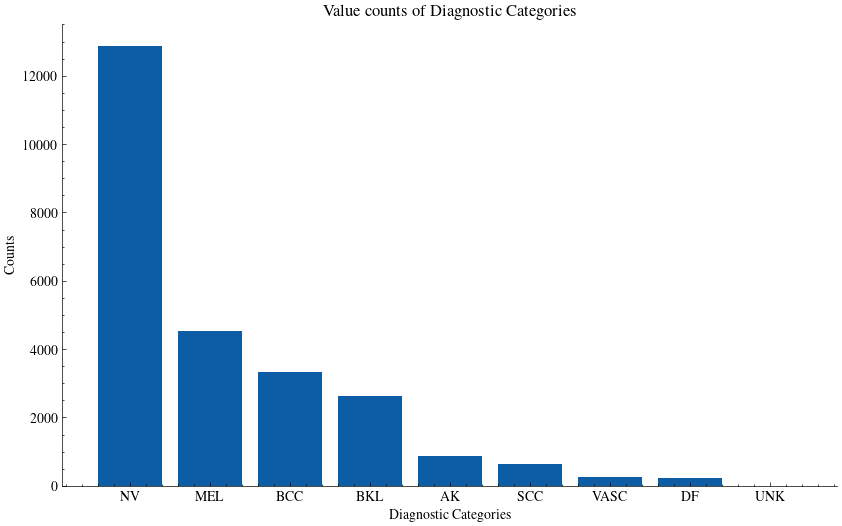

In [72]:
def get_value_counts_per_diagnostic_category(
    csv_path: str, plot: bool = True, **plot_kwargs
) -> pd.Series:
    """
    Given a ground truth CSV path, returns the counts per target class.
    Assumes a dummy encoding of the variables and that the first column is the ID of the sample.

    Parameters:
    -------------
    csv_path (str): Path to the ground truth csv
    plot (bool): Whether to plot the distribution or not
    
    Returns:
    -------------
    pd.Series: Series object with indexes as classes and values as sample counts per class
    """
    train_ground_truth = pd.read_csv(csv_path)
    counts = train_ground_truth.iloc[:, 1:].apply(lambda x: sum(x)).sort_values(ascending=False)
    
    # If plot is True, pass additional kwargs to the plotting function
    if plot:
        plot_value_counts_per_diagnostic_category(counts=counts, **plot_kwargs)

    return counts

def plot_value_counts_per_diagnostic_category(
    counts: pd.Series, save: bool = True, output: str = OUTPUT_FOLDER
) -> None:
    """
    Plots the distribution of counts per target class.

    Parameters:
    -------------
    counts (pd.Series): Series containing count values for each class
    save (bool): Whether to save the plot as a PDF
    output (str): Path to the output folder where the plot will be saved
    
    Returns:
    -------------
    None
    """
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    plt.bar(x=counts.index, height=counts.values)
    ax.spines[['right', 'top']].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.title("Value counts of Diagnostic Categories")
    plt.xlabel("Diagnostic Categories")
    plt.ylabel("Counts")
    if save: 
        os.makedirs(output, exist_ok=True)
        plt.savefig(os.path.join(output, "counts_per_target_class.pdf"))
    plt.show()

# Call

counts = get_value_counts_per_diagnostic_category(
    csv_path=data_paths["train_ground_truth"],
    plot=True,
    save=True,
    output=OUTPUT_FOLDER
)